In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from numpy.linalg import inv

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [13]:
mu, sigma = 0, 1 # mean and standard deviation

In [14]:
x = np.random.normal(mu, sigma,(1000,100))
x.shape

(1000, 100)

In [15]:
x[0].shape

(100,)

In [16]:
beta_true = np.random.normal(mu, sigma, (100,1))
beta_true[0:10]

array([[-1.36636373],
       [-1.0438323 ],
       [-2.46386231],
       [ 1.45850462],
       [ 0.54641567],
       [ 0.8272976 ],
       [-1.85234807],
       [-1.82203723],
       [-0.15925275],
       [-0.0903327 ]])

In [17]:
bias = np.random.normal(0,0.5,(1,1))
bias

array([[-0.07227926]])

In [18]:
beta_true_bias = np.vstack((beta_true,bias))
beta_true_bias.shape

(101, 1)

In [19]:
y = np.matmul(x,beta_true)+bias
y[0:10]

array([[ 10.10348328],
       [  3.77437071],
       [-14.16354447],
       [ 22.99869751],
       [  4.05493413],
       [ -1.16884286],
       [  3.95904789],
       [-10.45094303],
       [  6.17303721],
       [ 10.71636569]])

In [20]:
y[0].shape

(1,)

In [21]:
ones = np.ones_like(y)

In [22]:
x_ones = np.hstack((x,ones))
x_ones.shape

(1000, 101)

# Parte 1: Solución Cerrada

In [24]:
beta_optimo_cerrado = np.matmul(np.matmul(inv(np.matmul(x_ones.T,x_ones)),x_ones.T),y)
beta_optimo_cerrado[0:5]

array([[-1.36636373],
       [-1.0438323 ],
       [-2.46386231],
       [ 1.45850462],
       [ 0.54641567]])

In [25]:
beta_optimo_cerrado.shape #101 pues incluye el bias 

(101, 1)

# ¿Por que en la practica no se utiliza este metodo?
### Por lo costoso que puede resultar calcular la inversa cuando el problema se extiende a mas variables y a mayor cantidad de datos

# Parte 2: GD

In [26]:
w_nulo = np.zeros((101,1))
w_nulo.shape

(101, 1)

In [77]:
def GD(ye,w,equis,tol=0.1,epochs=20,lr=0.1):
    
    unos = np.ones_like(ye)
    features = np.hstack((equis,unos))
    
    nor_gradiente = 100
    i = 0 
    
    iteracion_k = []
    w_k = []
    pk = []
    norma_k = []
    
    cur_w = w
    
    while nor_gradiente > tol and i < epochs:
     
        prev_w = cur_w
        
        ## Gradiente descendente
        cur_w = cur_w - (lr * (-2 * np.matmul(features.T,ye) + 2 * np.matmul(np.matmul(features.T,features),prev_w)))
    
        ## Calculando el valor del grandiente
        gradiente = -2 * np.matmul(features.T,ye) + 2 * np.matmul(np.matmul(features.T,features),prev_w)
        
        ## Calculando la norma del gradiente         
        nor_gradiente = np.linalg.norm(gradiente)
        
        i = i+1
            
        iteracion_k.append(i)
        w_k.append(cur_w)
        pk.append(gradiente) 
        norma_k.append(nor_gradiente)

    

        #print("Iteracion: ", i)
        #print("x_inicial: ", x_inicial)
        #print("gradiente: ", gradiente)
        
    cadena_config = "GD""_LR="+str(lr)+"_i="+str(i)
    
    optimo = np.matmul(np.matmul(cur_w.T,features.T),ye)
            
    print("Norma del Gradiente: ", nor_gradiente)
    print("Forma del gradiente: ", gradiente.shape)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,norma_k)
    plt.show()
        
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k})
    return TableOut, iteracion_k, norma_k, cur_w, cadena_config, optimo  
    print(gradiente.shape)

Norma del Gradiente:  0.0010894984637143637
Forma del gradiente:  (101, 1)


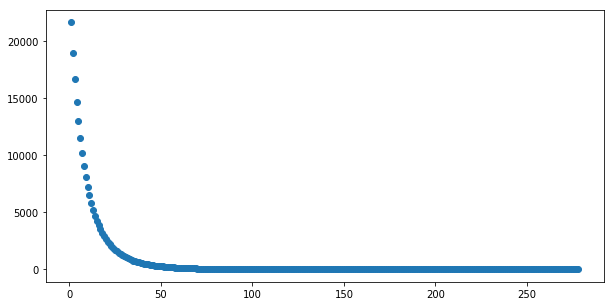

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.14160903001751077], [-0.12101284322690531...","[[2832.180600350215], [2420.256864538106], [43...",21647.178806
1,2,"[[-0.26562321117795723], [-0.22582921927883304...","[[2480.2836232089294], [2096.3275210385546], [...",18975.829705
2,3,"[[-0.37449790725538157], [-0.3168399615257302]...","[[2177.4939215484865], [1820.2148449379429], [...",16675.754955
3,4,"[[-0.4703257239914361], [-0.3960614206573698],...","[[1916.55633472109], [1584.429182632793], [325...",14691.240063
4,5,"[[-0.5548913295717035], [-0.46519612761186285]...","[[1691.3121116053474], [1382.6941390898605], [...",12975.319547
5,6,"[[-0.6297179379393518], [-0.5256834454063204],...","[[1496.5321673529672], [1209.7463558891507], [...",11488.369638
6,7,"[[-0.6961067219742957], [-0.5787418789906514],...","[[1327.7756806988764], [1061.16867168662], [24...",10196.929751
7,8,"[[-0.7551702317226493], [-0.6254044323506616],...","[[1181.2701949670718], [933.251067200202], [22...",9072.715384
8,9,"[[-0.8078607299171963], [-0.6665481692861374],...","[[1053.809963890939], [822.8747387095166], [20...",8091.791184
9,10,"[[-0.8549942186576305], [-0.7029189406426868],...","[[942.669774808684], [727.4154271309885], [186...",7233.878109


In [78]:
T_1, i_1, nor_1, w_1, kdna_1, op_1 = GD(y,w_nulo,x,tol=0.001102,epochs=300,lr=0.00005)
T_1

In [29]:
kdna_1

'GD_LR=5e-05_i=278'

In [79]:
op_1

array([[101876.65713174]])

Norma del Gradiente:  0.0018628409364764241
Forma del gradiente:  (101, 1)


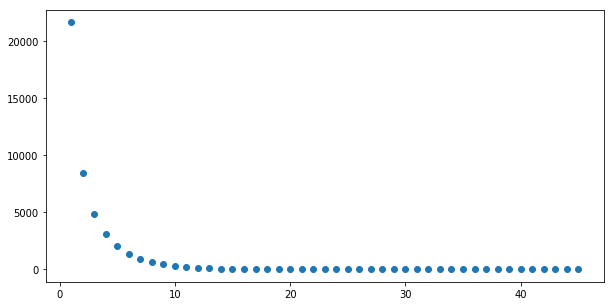

,Iteración k,W_k,Dirección,Norma
0,1,"[[-1.4160903001751075], [-1.210128432269053], ...","[[2832.180600350215], [2420.256864538106], [43...",21647.178806
1,2,"[[-1.0726957146437848], [-0.8006101470403492],...","[[-686.7891710626454], [-819.0365704574078], [...",8468.815939
2,3,"[[-1.4251800174481895], [-1.162278514260864], ...","[[704.9686056088094], [723.3367344410299], [-4...",4885.762479
3,4,"[[-1.301326658732338], [-0.9411401021388478], ...","[[-247.70671743170305], [-442.27682424403247],...",3093.308017
4,5,"[[-1.3833863967562021], [-1.1046675283072034],...","[[164.1194760477283], [327.05485233671106], [-...",2027.719353
5,6,"[[-1.3529622648946298], [-0.9969944618827167],...","[[-60.848263723144555], [-215.3461328489734], ...",1355.373231
6,7,"[[-1.3690135813868942], [-1.0742226167539655],...","[[32.10263298452901], [154.45630974249752], [-...",918.453656
7,8,"[[-1.3649223190230575], [-1.0215688356741495],...","[[-8.182524727673353], [-105.3075621596322], [...",628.927401
8,9,"[[-1.3655470648850305], [-1.0589330703381905],...","[[1.2494917239459937], [74.72846932808216], [-...",434.212087
9,10,"[[-1.3672488952486597], [-1.0330104704455323],...","[[3.403660727258284], [-51.845199785316254], [...",301.715878


In [80]:
T_2, i_2, nor_2, w_2, kdna_2, op_2 = GD(y,w_nulo,x,tol=0.001102,epochs=45,lr=0.0005)
T_2

In [31]:
kdna_2

'GD_LR=0.0005_i=45'

In [81]:
op_2

array([[101876.65947561]])

Norma del Gradiente:  3457485.3292165697
Forma del gradiente:  (101, 1)


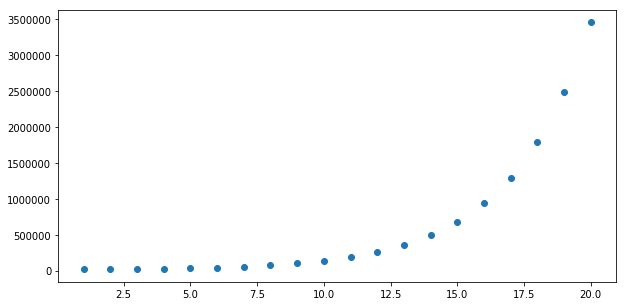

,Iteración k,W_k,Dirección,Norma
0,1,"[[-1.9825264202451507], [-1.6941798051766743],...","[[2832.180600350215], [2420.256864538106], [43...",2.164718e+04
1,2,"[[-0.5164624645056961], [-0.21385204405774516]...","[[-2094.377079627792], [-2114.7539444556132], ...",1.847286e+04
2,3,"[[-2.339326328753323], [-2.1194634837777127], ...","[[2604.0912346394675], [2722.3020567428107], [...",2.090487e+04
3,4,"[[-0.25292363667260354], [0.4146657500884059],...","[[-2980.575274401028], [-3620.1846198087405], ...",2.587792e+04
4,5,"[[-2.607115296064532], [-3.025636690315832], [...","[[3363.1309419884687], [4914.7177720060545], [...",3.326847e+04
5,6,"[[-0.0086189311622209], [1.6585474153829805], ...","[[-3712.1376641461584], [-6691.691579569732], ...",4.359732e+04
6,7,"[[-2.8167230391289353], [-4.736800226224599], ...","[[4011.577297095306], [9136.210916582257], [-2...",5.781355e+04
7,8,"[[0.13257341517321297], [4.014185457459554], [...","[[-4213.280649003069], [-12501.408119548789], ...",7.732245e+04
8,9,"[[-2.837359130414487], [-7.985802315413025], [...","[[4242.760779411], [17142.839675532257], [-523...",1.041140e+05
9,10,"[[-0.04911238205292667], [8.501407574476449], ...","[[-3983.209640516515], [-23553.15698555639], [...",1.409720e+05


In [82]:
T_3, i_3, nor_3, w_3, kdna_3, op_3 = GD(y,w_nulo,x,tol=0.001102,epochs=20,lr=0.0007)
T_3

In [83]:
kdna_3

'GD_LR=0.0007_i=20'

In [84]:
op_3

array([[-5345479.83423058]])

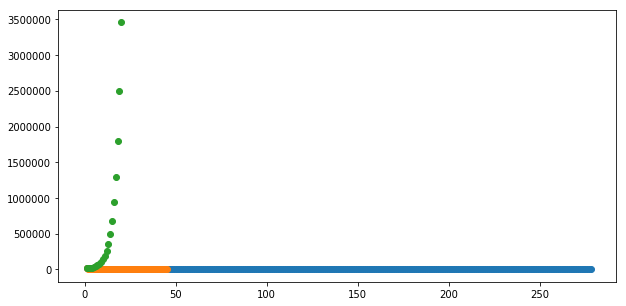

In [85]:
## Gráfica 
fig  = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(i_1,nor_1)
ax1.scatter(i_2,nor_2)
ax1.scatter(i_3,nor_3)
plt.show()

# ¿como el step size afecta la convergencia del GD? 
## este le afecto de tal forma que requirio de menos iteraciones para llegar al óptimo, alcanzando el erro mas bajo en la irteración 34

# ¿Con cual step size constante obtuvo el mejor" resultado?
## con el step size = 0.0005

# Parte 3: SGD

In [86]:
batch_size_s = 1
batch_size_s 

1

In [87]:
batches_s = int(x.shape[0] / batch_size_s)
batches_s

1000

In [89]:
def SGD(ye,w,equis,batch_size,tol=0.1,epochs=20,lr=0.1):
    
    unos = np.ones_like(y)
    features = np.hstack((equis,unos))
    
    nor_gradiente = 100
    i = 0 
    
    iteracion_k = []
    w_k = []
    pk = []
    norma_k = []
    
    cur_w = w
    
    batches = int(equis.shape[0] / batch_size) 
    
    while nor_gradiente > tol and i < epochs:
        
        for j in range(batches):
     
            prev_w = cur_w
        
            features_j = features[j].reshape((1, 101))
            ye_j = ye[j].reshape((1, 1)) 
        
            ## Gradiente descendente
            cur_w = cur_w - (lr * (-2 * np.matmul(features_j.T,ye_j) + 2 * np.matmul(np.matmul(features_j.T,features_j),prev_w)))
    
            ## Calculando el valor del grandiente
            gradiente = -2 * np.matmul(features_j.T,ye_j) + 2 * np.matmul(np.matmul(features_j.T,features_j),prev_w)
        
            ## Calculando la norma del gradiente         
            nor_gradiente = np.linalg.norm(gradiente)
        
        i = i+1
            
        iteracion_k.append(i)
        w_k.append(cur_w)
        pk.append(gradiente) 
        norma_k.append(nor_gradiente)

        #print("Iteracion: ", i)
        #print("x_inicial: ", x_inicial)
        #print("gradiente: ", gradiente)
        
    cadena_config = "SGD""_LR="+str(lr)+"_i="+str(i)
    
    optimo = np.matmul(np.matmul(cur_w.T,features.T),ye)
    
    print("Norma del Gradiente: ", nor_gradiente)
    print("Forma del gradiente: ", gradiente.shape)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,norma_k)
    plt.show()
        
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k})
    return TableOut, iteracion_k, norma_k, cur_w, cadena_config, optimo 
    #print(gradiente.shape)

Norma del Gradiente:  2.653812604092499
Forma del gradiente:  (101, 1)


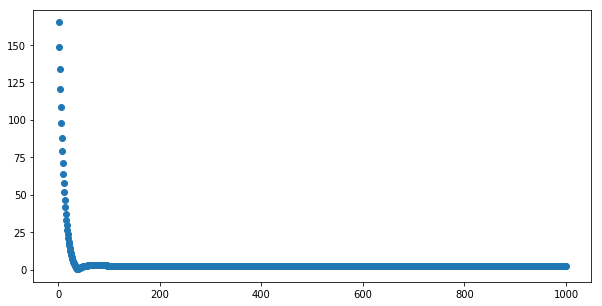

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.002993918496583256], [0.17709864770294514...","[[32.191090842126606], [-11.115729466825766], ...",165.014426
1,2,"[[-0.0047794058261069455], [0.3318190597433882...","[[29.01633862115814], [-10.019473145921346], [...",148.740360
2,3,"[[-0.005739884229123166], [0.46705985708215525...","[[26.150186979027495], [-9.029778002595226], [...",134.048209
3,4,"[[-0.006173217525674964], [0.5853383720717481]...","[[23.561892464844945], [-8.136028184012755], [...",120.780379
4,5,"[[-0.006307801642670458], [0.6888413060752945]...","[[21.22392007291383], [-7.328715727996059], [-...",108.795722
5,6,"[[-0.006315895000265741], [0.7794686102367383]...","[[19.111584864554974], [-6.599316813416844], [...",97.967702
6,7,"[[-0.006324637567286171], [0.8588715007251005]...","[[17.20273711714123], [-5.940183040732014], [-...",88.182777
7,8,"[[-0.006425136757794245], [0.9284853966952799]...","[[15.477485236128665], [-5.344445752253067], [...",79.338981
8,9,"[[-0.006679938596191421], [0.9895584628142885]...","[[13.917951488026667], [-4.805931685634337], [...",71.344671
9,10,"[[-0.007129152068447976], [1.0431763462244943]...","[[12.508056310708376], [-4.319088495246285], [...",64.117421


In [90]:
T_44, i_44, nor_44, w_44, kdna_44, op_44  = SGD(y,w_nulo,x,1,tol=0.001102,epochs=1000,lr=0.00005)
T_44

In [91]:
kdna_44

'SGD_LR=5e-05_i=1000'

In [ ]:
op_44

Norma del Gradiente:  1.7412940498682326
Forma del gradiente:  (101, 1)


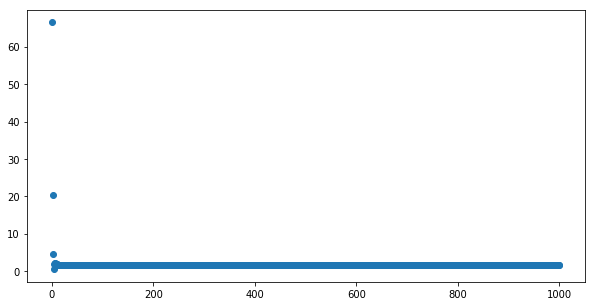

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.0174947289308675], [1.0796471270829822], ...","[[12.97112526075976], [-4.4789883010187035], [...",66.491154
1,2,"[[-0.03247563216322467], [1.3525555279706831],...","[[3.9860618354927624], [-1.376405205361765], [...",20.432911
2,3,"[[-0.055228190282495836], [1.427511200778083],...","[[0.9076940581590449], [-0.31343086938630016],...",4.652921
3,4,"[[-0.07398114740873969], [1.450349226487061], ...","[[-0.09195998607351186], [0.031754199693926566...",0.471395
4,5,"[[-0.08617558096533386], [1.458137787349448], ...","[[-0.3768864026661234], [0.13014058182456267],...",1.931954
5,6,"[[-0.09325973209172259], [1.4610986808573292],...","[[-0.43021279366434584], [0.1485544261607341],...",2.205309
6,7,"[[-0.09713869690322946], [1.4623427508735123],...","[[-0.4183198951684943], [0.14444775444511393],...",2.144345
7,8,"[[-0.09919618093253045], [1.462917647704772], ...","[[-0.39499531448091574], [0.13639367109261613]...",2.024781
8,9,"[[-0.10026992015060694], [1.4632092003227783],...","[[-0.37520498729229956], [0.12955998148055947]...",1.923334
9,10,"[[-0.10082645140846208], [1.463370406648406], ...","[[-0.36138945088504926], [0.12478941418617318]...",1.852515


In [92]:
T_4, i_4, nor_4, w_4, kdna_4, op_4 = SGD(y,w_nulo,x,1,tol=0.001102,epochs=1000,lr=0.0005)
T_4

In [93]:
kdna_4

'SGD_LR=0.0005_i=1000'

In [ ]:
op_4

In [94]:
T_5, i_5, nor_5, w_5, kdna_5, op_5 = SGD(y,w_nulo,x,1,tol=0.001102,epochs=1000,lr=0.005)
T_5

KeyboardInterrupt: 

In [ ]:
kdna_5

In [ ]:
op_5

Norma del Gradiente:  inf
Forma del gradiente:  (101, 1)


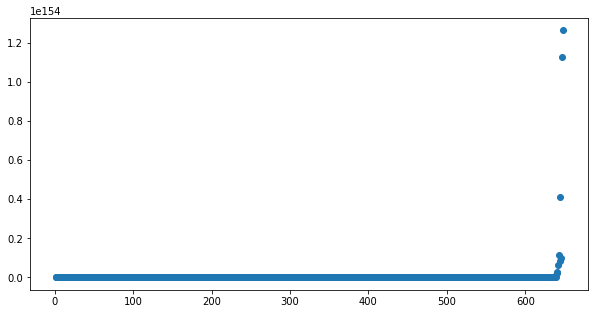

(     Iteración k                                                W_k  \
 0              1  [[1.478649601799507], [2.499317079301008], [1....   
 1              2  [[2.3908962580494104], [-0.183279817932687], [...   
 2              3  [[-6.846932916638007], [6.02646025082758], [2....   
 3              4  [[10.08313811063437], [-3.9898946322766364], [...   
 4              5  [[5.776096567503583], [-8.477326547923061], [-...   
 5              6  [[3.545581367568683], [10.820445610589662], [6...   
 6              7  [[-31.603655178130204], [17.23134668963583], [...   
 7              8  [[44.58104273265546], [-25.969891652778838], [...   
 8              9  [[86.48720726330619], [-63.41226386748424], [-...   
 9             10  [[-139.3623419163713], [7.069245146437098], [-...   
 10            11  [[27.65280489784189], [78.68528536611292], [7....   
 11            12  [[350.89346180479055], [32.538361324290584], [...   
 12            13  [[-222.86236942186514], [41.2917391838274], [

In [45]:
T_6, i_6, nor_6, w_6, kdna_6, op_6 = SGD(y,w_nulo,x,1,tol=0.001102,epochs=1000,lr=0.01)
T_6

In [ ]:
kdna_6

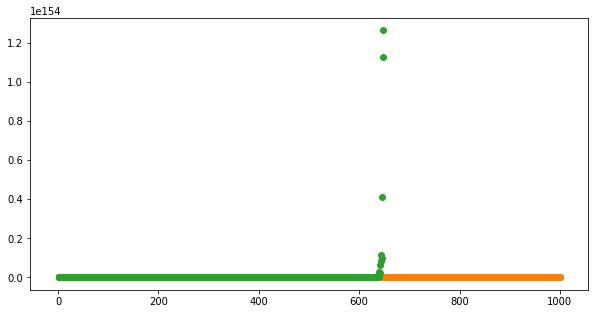

In [48]:
## Gráfica 
fig  = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(i_4,nor_4)
ax1.scatter(i_5,nor_5)
ax1.scatter(i_6,nor_6)
plt.show()

# ¿como el step size afecta la convergencia del SGD?

# ¿Con cual step size constante obtuvo el mejor resultado?

# Parte 4: MBGD

In [35]:
batch_size = 32
batch_size 

32

In [36]:
batches = int(x.shape[0] / batch_size)
batches

31

In [91]:
def MBGD(ye,w,equis,batch_size,tol=0.1,epochs=20,lr=0.1):
    
    unos = np.ones_like(y)
    features = np.hstack((equis,unos))
    
    nor_gradiente = 100
    i = 0 
    
    iteracion_k = []
    w_k = []
    pk = []
    norma_k = []
    
    cur_w = w
    
    batches = int(equis.shape[0] / batch_size) 
    
    while nor_gradiente > tol and i < epochs:
        
        for j in range(batches):
     
            prev_w = cur_w
        
            features_j = features[j:j+batch_size]
            ye_j = ye[j:j+batch_size] 
        
            ## Gradiente descendente
            cur_w = cur_w - (lr * (-2 * np.matmul(features_j.T,ye_j) + 2 * np.matmul(np.matmul(features_j.T,features_j),prev_w)))
    
            ## Calculando el valor del grandiente
            gradiente = -2 * np.matmul(features_j.T,ye_j) + 2 * np.matmul(np.matmul(features_j.T,features_j),prev_w)
        
            ## Calculando la norma del gradiente         
            nor_gradiente = np.linalg.norm(gradiente)
        
        i = i+1
            
        iteracion_k.append(i)
        w_k.append(cur_w)
        pk.append(gradiente) 
        norma_k.append(nor_gradiente)

    

        #print("Iteracion: ", i)
        #print("x_inicial: ", x_inicial)
        #print("gradiente: ", gradiente)
            
    cadena_config = "MBGD""_LR="+str(lr)+"_i="+str(i)+"_BatchSize="+str(batch_size)
    
    optimo = np.matmul(np.matmul(cur_w.T,features.T),ye)
    
    print("Norma del Gradiente: ", nor_gradiente)
    print("Forma del gradiente: ", gradiente.shape)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,norma_k)
    plt.show()
        
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k})
    return TableOut, iteracion_k, norma_k, cur_w, cadena_config, optimo 
    print(gradiente.shape)

# batches de tamaño 25 step sizes: 0.0005, 0.005 y 0.01

Norma del Gradiente:  126.90370045709493
Forma del gradiente:  (101, 1)


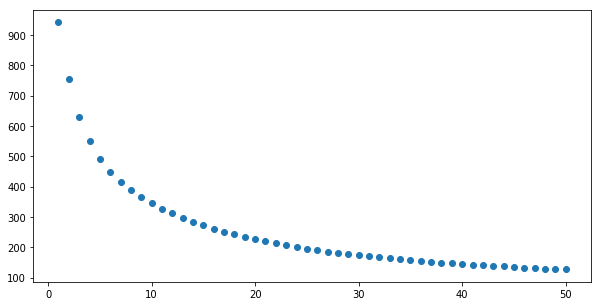

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.3440310070307683], [-0.08500647737895349]...","[[138.16185437707873], [65.31257073857455], [7...",941.917733
1,2,"[[-0.5865999947870791], [-0.14268720613004793]...","[[106.1699310912207], [63.54337614469832], [57...",753.933512
2,3,"[[-0.7611364046741612], [-0.1821267143545296],...","[[82.31787645251102], [62.03614421247231], [46...",631.183014
3,4,"[[-0.8893306087871298], [-0.20942136074783543]...","[[64.20092587840782], [60.75590125549503], [36...",549.029889
4,5,"[[-0.9854096330722726], [-0.2286404392896274],...","[[50.20075266626233], [59.63462501938616], [28...",491.605080
5,6,"[[-1.058814549648271], [-0.24248673739899154],...","[[39.21075321932446], [58.60660206050741], [22...",449.174277
6,7,"[[-1.1158899564933933], [-0.2527472761739332],...","[[30.461763173977403], [57.620857187446916], [...",416.010475
7,8,"[[-1.1609585011185], [-0.26059889219976173], [...","[[23.410225641666727], [56.643065769733354], [...",388.822630
8,9,"[[-1.1970097839424187], [-0.26681416398149227]...","[[17.665575280400986], [55.653238358958674], [...",365.722894
9,10,"[[-1.226145622507275], [-0.27189938159149474],...","[[12.942503499850403], [54.64220256691756], [8...",345.606101


In [92]:
T_77, i_77, nor_77, w_77, kdna_77, op_77 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=50,lr=0.00005)
T_77

In [90]:
kdna_77

'MBGD_LR=5e-05_i=50_BatchSize=25'

In [93]:
op_77

array([[52271.25532758]])

Norma del Gradiente:  34.940888182302494
Forma del gradiente:  (101, 1)


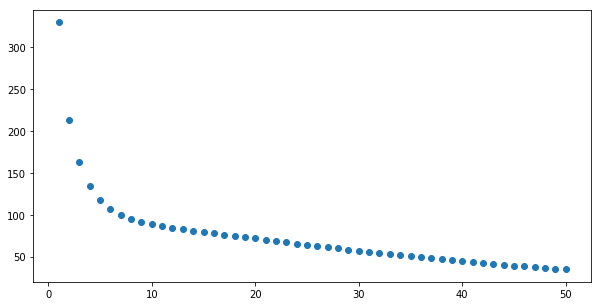

,Iteración k,W_k,Dirección,Norma
0,1,"[[-1.160027279248053], [-0.49563171689692964],...","[[9.338601866298575], [49.211326153276005], [2...",329.312263
1,2,"[[-1.28783332216891], [-0.4771884919795508], [...","[[-8.769207817113909], [37.17061616752089], [5...",212.984844
2,3,"[[-1.3001829614899023], [-0.44275166753127665]...","[[-11.574424151553899], [29.836448298659754], ...",162.401303
3,4,"[[-1.2849797638138738], [-0.4214215609075359],...","[[-11.571790964137733], [25.223697894897455], ...",134.895502
4,5,"[[-1.265583534700677], [-0.4136794279343675], ...","[[-11.155356228483356], [22.0724092265823], [5...",118.161964
5,6,"[[-1.2482010873215093], [-0.41526706332750585]...","[[-10.818803916806502], [19.770967806607956], ...",107.341867
6,7,"[[-1.2339089164604318], [-0.4224632004898337],...","[[-10.613434231714592], [18.002432219457006], ...",100.067927
7,8,"[[-1.2223506161741935], [-0.4327432364214161],...","[[-10.499142441097945], [16.58663040995996], [...",95.006589
8,9,"[[-1.21288743221444], [-0.44452503205573674], ...","[[-10.431198727877643], [15.414224946568304], ...",91.341379
9,10,"[[-1.2049357353204226], [-0.4568525433308519],...","[[-10.377665779971608], [14.41610683968186], [...",88.553120


In [94]:
T_7, i_7, nor_7, w_7, kdna_7, op_7 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=50,lr=0.0005)
T_7

In [95]:
kdna_7

'MBGD_LR=0.0005_i=50_BatchSize=25'

In [96]:
op_7

array([[63080.7124743]])

Norma del Gradiente:  191504715.5136607
Forma del gradiente:  (101, 1)


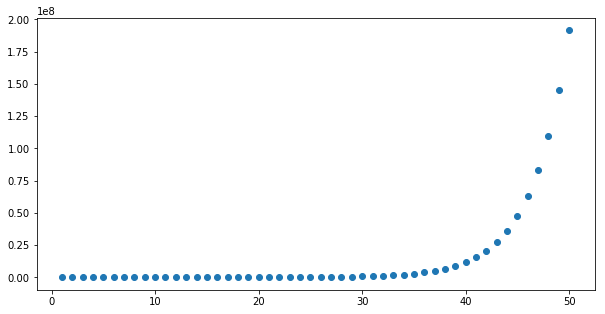

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.9664041543706443], [-0.7535150616969062],...","[[29.814710852833656], [-0.15937690254951065],...",7.349221e+02
1,2,"[[-1.060621510608124], [-0.7042820483705869], ...","[[-8.095536876553496], [11.8207608215221], [-4...",1.448697e+02
2,3,"[[-0.9678840861769433], [-0.5640308349911507],...","[[17.023045626628146], [9.03256984002077], [-5...",6.781408e+02
3,4,"[[-1.029711346189201], [-0.7517559345907883], ...","[[-24.106023514255355], [9.142983010595138], [...",4.024006e+02
4,5,"[[-0.9100685731337211], [-0.5407644136864668],...","[[26.546610748589615], [3.816258237785142], [-...",7.964128e+02
5,6,"[[-1.0495407332473752], [-0.8521945091746389],...","[[-41.59607788736784], [6.514834290747977], [8...",9.027116e+02
6,7,"[[-0.8579297434060185], [-0.4661436930558795],...","[[48.383257767120256], [-0.23415127762670807],...",1.265856e+03
7,8,"[[-1.1087836739423287], [-0.9946278918255653],...","[[-69.75381697567738], [6.425965510943328], [1...",1.631099e+03
8,9,"[[-0.7777527442370316], [-0.3111853980106837],...","[[87.10196041381734], [-3.9504786932386793], [...",2.174738e+03
9,10,"[[-1.2156656272886446], [-1.224383902411018], ...","[[-119.06598298887772], [8.61734396001178], [2...",2.857948e+03


In [97]:
T_8, i_8, nor_8, w_8, kdna_8, op_8 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=50,lr=0.005)
T_8

In [43]:
kdna_8

'MBGD_LR=0.005_i=50_BatchSize=25'

In [98]:
op_8

array([[1.09810528e+09]])

C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


Norma del Gradiente:  nan
Forma del gradiente:  (101, 1)


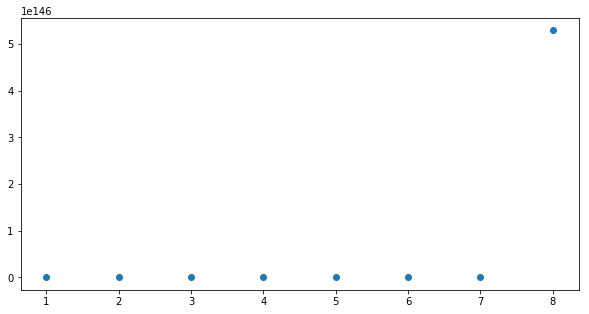

,Iteración k,W_k,Dirección,Norma
0,1,"[[-1.1481228455857778e+18], [5.991334268785157...","[[1.5837257671104502e+20], [-2.020627079303421...",2.790960e+21
1,2,"[[8.93283750058932e+35], [-3.275494639507589e+...","[[-1.229663998492734e+38], [1.3497127708992529...",2.178820e+39
2,3,"[[-7.057649815281789e+53], [2.607355116701105e...","[[9.715683098369223e+55], [-1.0695680429428392...",1.721405e+57
3,4,"[[5.574557925272694e+71], [-2.0591582131560244...","[[-7.674027714585429e+73], [8.44762214860315e+...",1.359670e+75
4,5,"[[-4.403145297292905e+89], [1.626460193324175e...","[[6.061441990322387e+91], [-6.672483654668926e...",1.073955e+93
5,6,"[[3.4778877325622145e+107], [-1.28468294695374...","[[-4.7877172591981485e+109], [5.27035721674560...",8.482790e+110
6,7,"[[-2.747059723369436e+125], [1.014725332009735...","[[3.7816474426547883e+127], [-4.16286756689849...",6.700254e+128
7,8,"[[2.169804692902424e+143], [-8.014954202245188...","[[-2.986988705840598e+145], [3.288100912289822...",5.292292e+146
8,9,"[[-1.713851491939781e+161], [6.330727029158067...","[[2.359316055798764e+163], [-2.597153869475301...",inf
9,10,"[[1.3537102883186858e+179], [-5.00041593581055...","[[-1.863539771765983e+181], [2.051399394865958...",inf


In [99]:
T_9, i_9, nor_9, w_9, kdna_9, op_9 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=50,lr=0.01)
T_9

In [45]:
kdna_9

'MBGD_LR=0.01_i=18_BatchSize=25'

In [100]:
op_9

array([[nan]])

# batches de tamaño 50 step sizes: 0.0005, 0.005 y 0.01

Norma del Gradiente:  139.88641184903025
Forma del gradiente:  (101, 1)


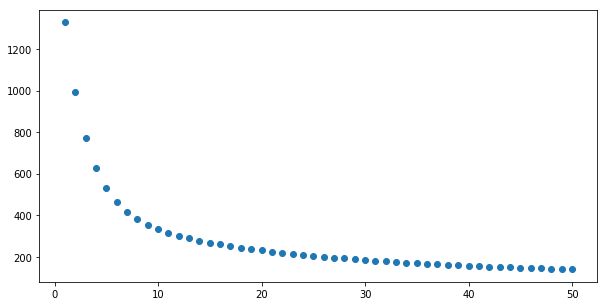

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.3418039881991094], [-0.08638581011485409]...","[[250.6966630368213], [90.64748477143941], [13...",1328.093463
1,2,"[[-0.5834547718667328], [-0.14839308516935804]...","[[176.58390726151666], [76.47274481977269], [9...",992.395284
2,3,"[[-0.7569248805380371], [-0.19381316825712455]...","[[125.18970145196715], [67.03475639684424], [6...",772.534465
3,4,"[[-0.8833635029693325], [-0.22796014597857212]...","[[89.03756586380592], [60.74984075521456], [41...",627.274562
4,5,"[[-0.9769030476467423], [-0.25442626518597655]...","[[63.23559236753027], [56.515973340795426], [2...",529.883088
5,6,"[[-1.0470880345177562], [-0.2756221524706811],...","[[44.54977141004463], [53.5836414599212], [13....",463.071289
6,7,"[[-1.1004367153616996], [-0.2931564423306284],...","[[30.819320554373064], [51.45423113534815], [5...",415.792104
7,8,"[[-1.1414530115246295], [-0.3080987655104816],...","[[20.584812475844217], [49.80364946181996], [-...",381.088436
8,9,"[[-1.1732875630159778], [-0.32115972657678865]...","[[12.84962789544943], [48.42673657480956], [-5...",354.618974
9,10,"[[-1.1981731192058689], [-0.33281274706175373]...","[[6.925567280633459], [47.19779656658567], [-8...",333.673901


In [102]:
T_100, i_100, nor_100, w_100, kdna_100, op_100 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=50,lr=0.00005)
T_100

In [47]:
kdna_100

'MBGD_LR=5e-05_i=50_BatchSize=50'

In [103]:
op_100

array([[56096.61388902]])

Norma del Gradiente:  9.57643340701596
Forma del gradiente:  (101, 1)


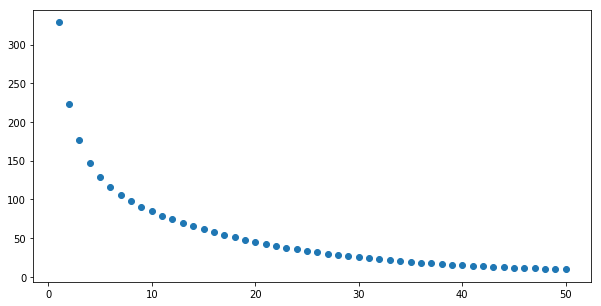

,Iteración k,W_k,Dirección,Norma
0,1,"[[-1.1666311702673364], [-0.4258125836332891],...","[[6.633986242433707], [42.308156206908635], [-...",328.825026
1,2,"[[-1.2428363096878217], [-0.4744350925606012],...","[[-12.982244725582916], [34.03337615384115], [...",223.660683
2,3,"[[-1.226367814581214], [-0.502180445801015], [...","[[-15.051546243661448], [26.79491681102722], [...",176.412928
3,4,"[[-1.19100387182737], [-0.5288077380530937], [...","[[-14.289160067039688], [21.842677469690784], ...",147.591803
4,5,"[[-1.153792241791433], [-0.5569116814801102], ...","[[-13.025438990906082], [18.41651157662723], [...",128.697901
5,6,"[[-1.1189254643561735], [-0.5855364432565918],...","[[-11.787404271497053], [15.90686772250092], [...",115.459656
6,7,"[[-1.0871096873963806], [-0.6135056612340803],...","[[-10.677079610703174], [13.975002560314906], ...",105.475810
7,8,"[[-1.05816623275933], [-0.6400743979517542], [...","[[-9.696868282776222], [12.431525397534728], [...",97.420137
8,9,"[[-1.0317482611353308], [-0.664894829060211], ...","[[-8.830296330382737], [11.162870136447566], [...",90.571050
9,10,"[[-1.0075235979534312], [-0.6878743648919045],...","[[-8.060412741723269], [10.096135677842184], [...",84.534595


In [104]:
T_10, i_10, nor_10, w_10, kdna_10, op_10 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=50,lr=0.0005)
T_10

In [49]:
kdna_10

'MBGD_LR=0.0005_i=50_BatchSize=50'

In [105]:
op_10

array([[71368.85665374]])

Norma del Gradiente:  inf
Forma del gradiente:  (101, 1)


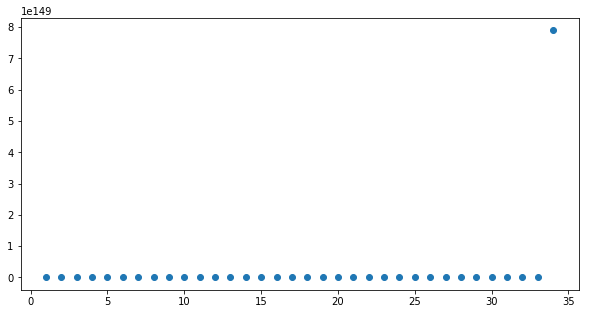

,Iteración k,W_k,Dirección,Norma
0,1,"[[7287.769433748807], [-3004.423961681], [-380...","[[-2478094.368952039], [1082382.693555018], [1...",1.449522e+07
1,2,"[[160888708.40307423], [-63474407.03821166], [...","[[-54768091627.49307], [23094499595.67374], [3...",3.161899e+11
2,3,"[[3483441226286.688], [-1363680402004.9287], [...","[[-1186530349893895.0], [496862255195204.56], ...",6.751512e+15
3,4,"[[7.447477147824629e+16], [-2.9062819848147584...","[[-2.5374471245013717e+19], [1.059399108926821...",1.433452e+20
4,5,"[[1.5822200612818057e+21], [-6.165111615934392...","[[-5.391513687505027e+23], [2.2477765395203395...",3.035197e+24
5,6,"[[3.35107805985064e+25], [-1.3047867537666512e...","[[-1.1419725040802946e+28], [4.757683305031962...",6.417986e+28
6,7,"[[7.086735605988714e+29], [-2.758320679495204e...","[[-2.4150754475957323e+32], [1.005824519688810...",1.356175e+33
7,8,"[[1.4975658107681338e+34], [-5.827838897521942...","[[-5.1036038727944803e+36], [2.125179195770579...",2.864746e+37
8,9,"[[3.1634959972984913e+38], [-1.230980220627848...","[[-1.078106246897179e+41], [4.488945018430211e...",6.050404e+41
9,10,"[[6.681450609380144e+42], [-2.5997759639520187...","[[-2.2770188509945558e+45], [9.480509810827942...",1.277753e+46


In [106]:
T_11, i_11, nor_11, w_11, kdna_11, op_11 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=50,lr=0.005)
T_11

In [51]:
kdna_11

'MBGD_LR=0.005_i=50_BatchSize=50'

In [107]:
op_11

array([[-2.06312195e+219]])

C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


Norma del Gradiente:  nan
Forma del gradiente:  (101, 1)


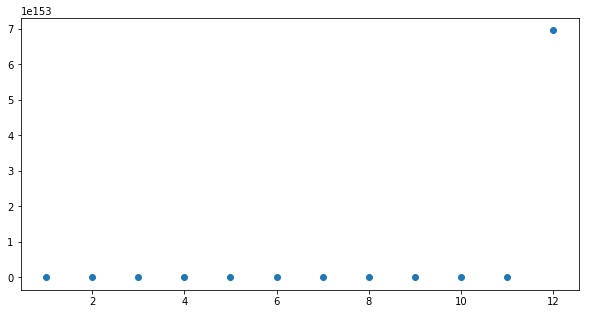

,Iteración k,W_k,Dirección,Norma
0,1,"[[1323978749363.5132], [-619588615321.8152], [...","[[-167019621427968.34], [79404454140341.84], [...",9.624874e+14
1,2,"[[5.671534558017294e+24], [-2.5175092864360707...","[[-7.155754226174501e+26], [3.237614816887336e...",4.148653e+27
2,3,"[[2.423310660443665e+37], [-1.0636637929858688...","[[-3.05846249182706e+39], [1.3688532700697248e...",1.750023e+40
3,4,"[[1.0275830183384414e+50], [-4.489199709192724...","[[-1.2971059995628751e+52], [5.778367102689610...",7.353193e+52
4,5,"[[4.334372373933506e+62], [-1.8886559866639175...","[[-5.471664293720355e+64], [2.4312350069844765...",3.084661e+65
5,6,"[[1.822405540679874e+75], [-7.928997765818963e...","[[-2.3006903244199434e+77], [1.020735663065926...",1.292807e+78
6,7,"[[7.647894951427866e+87], [-3.3245375627122006...","[[-9.65532097081901e+89], [4.2799470959106297e...",5.415194e+90
7,8,"[[3.2059298035771897e+100], [-1.39289002734538...","[[-4.047489052412286e+102], [1.793209988448121...",2.267492e+103
8,9,"[[1.3430118436566917e+113], [-5.83322585823387...","[[-1.6955694222985288e+115], [7.50978227665743...",9.492666e+115
9,10,"[[5.623885240299741e+125], [-2.442228001913815...","[[-7.100265427153486e+127], [3.144179016547337...",3.973538e+128


In [109]:
T_12, i_12, nor_12, w_12, kdna_12, op_12 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=50,lr=0.01)
T_12

In [110]:
kdna_12

'MBGD_LR=0.01_i=25_BatchSize=50'

In [111]:
op_12

array([[nan]])

# batches de tamaño 100 step sizes: 0.0005, 0.005 y 0.01

Norma del Gradiente:  21.47590843282578
Forma del gradiente:  (101, 1)


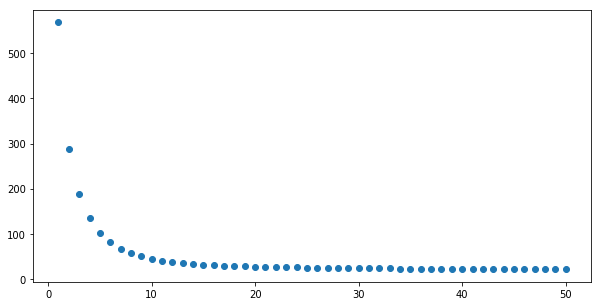

,Iteración k,W_k,Dirección,Norma
0,1,"[[-1.1534020497232884], [-0.5029699036436436],...","[[41.09934766826916], [-5.36570652572405], [13...",568.260444
1,2,"[[-1.3044340130356833], [-0.5488442423526526],...","[[1.2373795041137328], [-13.53341956603154], [...",287.721021
2,3,"[[-1.3490855727970006], [-0.5883715219781646],...","[[-5.493239015282825], [-7.988090369228956], [...",187.701239
3,4,"[[-1.3634561569666424], [-0.6368402485372349],...","[[-7.056967389240185], [-5.049486757009589], [...",134.875098
4,5,"[[-1.3659337849595001], [-0.6853110494490873],...","[[-7.010823008125158], [-3.9872250801271036], ...",102.664741
5,6,"[[-1.3635155507836167], [-0.7292378150899503],...","[[-6.385267661622265], [-3.7608127987077467], ...",81.712337
6,7,"[[-1.359214423669664], [-0.7673622984316372], ...","[[-5.598098069537855], [-3.839736939057417], [...",67.520881
7,8,"[[-1.3543371920658047], [-0.7998526115049829],...","[[-4.821793187511503], [-3.992563864190629], [...",57.592183
8,9,"[[-1.3494295125369578], [-0.8273617752525112],...","[[-4.119212718859103], [-4.127851765562809], [...",50.444297
9,10,"[[-1.344699711972822], [-0.850633179501045], [...","[[-3.50583749760699], [-4.21540713506235], [3....",45.165314


In [114]:
T_133, i_133, nor_133, w_133, kdna_133, op_133 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=50,lr=0.0005)
T_133

In [115]:
kdna_133

'MBGD_LR=0.0005_i=50_BatchSize=100'

In [116]:
op_133

array([[96197.28682769]])

Norma del Gradiente:  21.47590843282578
Forma del gradiente:  (101, 1)


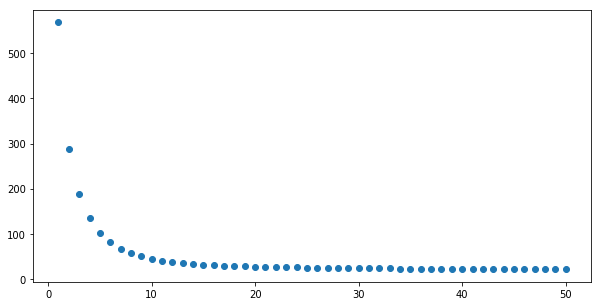

,Iteración k,W_k,Dirección,Norma
0,1,"[[-1.1534020497232884], [-0.5029699036436436],...","[[41.09934766826916], [-5.36570652572405], [13...",568.260444
1,2,"[[-1.3044340130356833], [-0.5488442423526526],...","[[1.2373795041137328], [-13.53341956603154], [...",287.721021
2,3,"[[-1.3490855727970006], [-0.5883715219781646],...","[[-5.493239015282825], [-7.988090369228956], [...",187.701239
3,4,"[[-1.3634561569666424], [-0.6368402485372349],...","[[-7.056967389240185], [-5.049486757009589], [...",134.875098
4,5,"[[-1.3659337849595001], [-0.6853110494490873],...","[[-7.010823008125158], [-3.9872250801271036], ...",102.664741
5,6,"[[-1.3635155507836167], [-0.7292378150899503],...","[[-6.385267661622265], [-3.7608127987077467], ...",81.712337
6,7,"[[-1.359214423669664], [-0.7673622984316372], ...","[[-5.598098069537855], [-3.839736939057417], [...",67.520881
7,8,"[[-1.3543371920658047], [-0.7998526115049829],...","[[-4.821793187511503], [-3.992563864190629], [...",57.592183
8,9,"[[-1.3494295125369578], [-0.8273617752525112],...","[[-4.119212718859103], [-4.127851765562809], [...",50.444297
9,10,"[[-1.344699711972822], [-0.850633179501045], [...","[[-3.50583749760699], [-4.21540713506235], [3....",45.165314


In [117]:
T_13, i_13, nor_13, w_13, kdna_13, op_13 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=50,lr=0.0005)
T_13

In [57]:
kdna_13

'MBGD_LR=0.0005_i=50_BatchSize=100'

In [118]:
op_13

array([[96197.28682769]])

Norma del Gradiente:  inf
Forma del gradiente:  (101, 1)


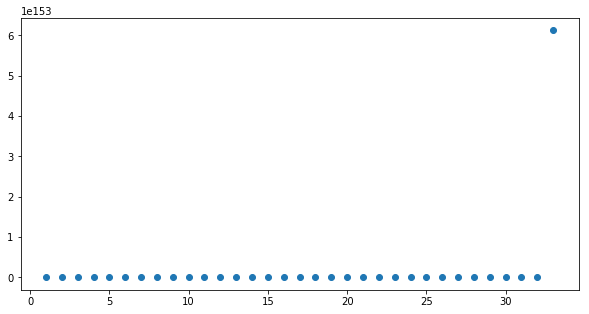

,Iteración k,W_k,Dirección,Norma
0,1,"[[5409.635268676688], [-2772.302232186168], [-...","[[-1487310.2726988534], [754262.6764239069], [...",1.080122e+07
1,2,"[[160144507.43239257], [-89999319.28205761], [...","[[-43433993665.88412], [24576870028.857323], [...",3.215465e+11
2,3,"[[5704187935878.456], [-2840237307915.17], [-1...","[[-1544484203461163.5], [770884626123442.9], [...",1.039324e+16
3,4,"[[2.1108166979559146e+17], [-9.28748853468232e...","[[-5.7128031188843454e+19], [2.505030153642136...",3.589207e+20
4,5,"[[7.959666818321794e+21], [-3.1437137314641053...","[[-2.1536848303622148e+24], [8.42785670514763e...",1.309139e+25
5,6,"[[3.041595845204641e+26], [-1.0988564925470792...","[[-8.228271529688097e+28], [2.9295497437819213...",4.952847e+29
6,7,"[[1.1736104533440161e+31], [-3.951288969802941...","[[-3.174481547933594e+33], [1.0483828308154896...",1.913774e+34
7,8,"[[4.560328240692061e+35], [-1.4547951937164731...","[[-1.2333976278636721e+38], [3.844897784236402...",7.477765e+38
8,9,"[[1.7809228668857437e+40], [-5.458066654879979...","[[-4.81639869515178e+42], [1.438114045363128e+...",2.938318e+43
9,10,"[[6.979627874687505e+44], [-2.077508695560823e...","[[-1.8875075640358143e+47], [5.461260676036632...",1.157802e+48


In [119]:
T_14, i_14, nor_14, w_14, kdna_14, op_14 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=50,lr=0.005)
T_14

In [59]:
kdna_14

'MBGD_LR=0.005_i=50_BatchSize=100'

In [120]:
op_14

array([[-3.61382364e+232]])

C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in subtract
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


Norma del Gradiente:  nan
Forma del gradiente:  (101, 1)


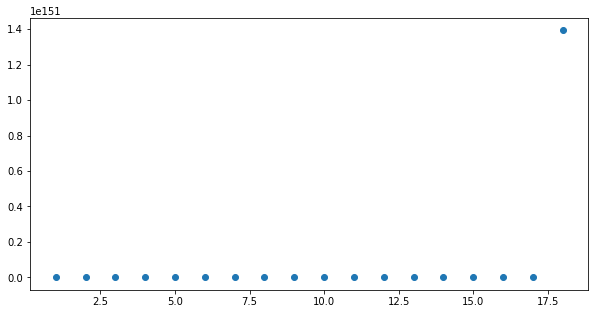

,Iteración k,W_k,Dirección,Norma
0,1,"[[30888238.827067174], [-13526897.913879942], ...","[[-3586124721.5426736], [1551327798.7312646], ...",2.477664e+10
1,2,"[[4412090629494105.0], [-2482723413891677.5], ...","[[-5.084333746922705e+17], [2.8671602219943773...",3.782757e+18
2,3,"[[7.859891157501879e+23], [-4.0526898854224154...","[[-9.044704292607595e+25], [4.675980563407366e...",6.266269e+26
3,4,"[[1.468367513907328e+32], [-6.765177463809094e...","[[-1.6889844772457752e+34], [7.796491218846645...",1.089786e+35
4,5,"[[2.794473136837463e+40], [-1.1583448156611984...","[[-3.2135423581875356e+42], [1.333348619806873...",1.982112e+43
5,6,"[[5.382406558565016e+48], [-2.0327523967098153...","[[-6.188450467239831e+50], [2.337186088541395e...",3.734066e+51
6,7,"[[1.0461111537205556e+57], [-3.650748461808860...","[[-1.2026045749632576e+59], [4.193061245808093...",7.205550e+59
7,8,"[[2.0473201031173764e+65], [-6.695059945556105...","[[-2.3533396722026125e+67], [7.682401778340819...",1.411311e+68
8,9,"[[4.027903967865591e+73], [-1.2502483763962193...","[[-4.629595705241521e+75], [1.4334831144538522...",2.788407e+76
9,10,"[[7.955969885223533e+81], [-2.3703958447786307...","[[-9.143888542874795e+83], [2.7160143876369135...",5.536303e+84


In [121]:
T_15, i_15, nor_15, w_15, kdna_15, op_15 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=50,lr=0.01)
T_15

In [61]:
kdna_15

'MBGD_LR=0.01_i=38_BatchSize=100'

In [122]:
op_15

array([[nan]])

# ¿Como el tamaño del batch afecta la convergencia de este algoritmo?

# ¿Con cual combinacion de batch size y step size obtuvo el mejor resultado?

# Parte 5: Comparación

In [123]:
f_optimo = [op_1]
f_optimo

[array([[101876.65713174]])]

In [71]:
model_name = [kdna_1]
#model_name

In [76]:
w_obtneido = [w_1]
#w_obtneido
w_1.shape

(101, 1)

In [73]:
w_real = [beta_true_bias]
#w_real

In [124]:
Tabla_Resumen = pd.DataFrame(data = {'Modelo':model_name, 'f óptimo':f_optimo, 'W Obtneido':w_obtneido, 'W Real':w_real})
Tabla_Resumen

,Modelo,f óptimo,W Obtneido,W Real
0,GD_LR=5e-05_i=278,[[101876.65713174277]],"[[-1.3663636474685188], [-1.0438322657176275],...","[[-1.3663637338145764], [-1.0438323041205844],..."


In [54]:
unos = np.ones_like(y)
unos.shape


(1000, 1)

In [65]:
np.hstack((x,unos)).shape

(1000, 101)